## Assignment 6.1

In [27]:
from keras import layers
from keras import models
import pandas as pd

#initiate a small convnet

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#add a clasifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [28]:
#training the convnet on MNIST images
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#shuffle the training set
for _ in range(5): 
    indexes = np.random.permutation(len(train_images))
    
train_images = train_images[indexes]
train_labels = train_labels[indexes]

#set aside 10,000 for validation
val_images = train_images[:10000,:]
val_labels = train_labels[:10000,:]

# leave rest in training set
train_images2 = train_images[10000:,:]
train_labels2 = train_labels[10000:,:]

train_images2.shape, val_images.shape

((50000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images2, train_labels2, epochs=5, batch_size=64,
             validation_data=(val_images, val_labels))

Epoch 1/5
782/782 [==============================] - 12s 16ms/step - loss: 0.2095 - accuracy: 0.9345 - val_loss: 0.0609 - val_accuracy: 0.9808
Epoch 2/5
782/782 [==============================] - 13s 16ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 3/5
782/782 [==============================] - 13s 16ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0503 - val_accuracy: 0.9841
Epoch 4/5
782/782 [==============================] - 12s 16ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0508 - val_accuracy: 0.9837
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0341 - val_accuracy: 0.9902


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

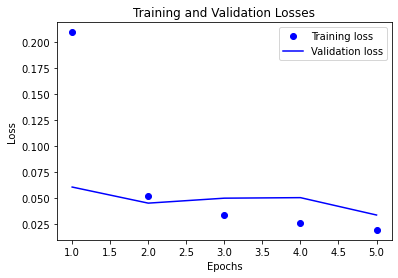

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.savefig('results/6_1_lossplot.png')



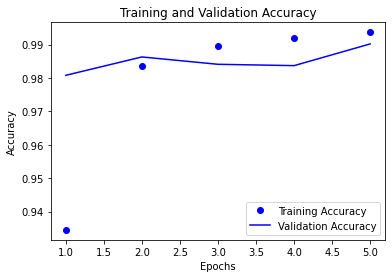

<Figure size 432x288 with 0 Axes>

In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.savefig('results/6_1_accplot.png')

In [33]:
#retrain and evaluate for 3 epochs
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, batch_size=64)
results = model.evaluate(test_images, test_labels)

Epoch 1/3
938/938 [==============================] - 14s 15ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 2/3
938/938 [==============================] - 13s 14ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9911


In [34]:
results

[0.033917371183633804, 0.991100013256073]

In [35]:
history.history

{'loss': [0.020565001294016838, 0.015492850914597511, 0.013041118159890175],
 'accuracy': [0.9937000274658203, 0.9954000115394592, 0.9959666728973389]}

In [36]:
model.save('results/6_1_model.h5')